In [187]:
## Importing required libraries
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from time import time
from sklearn.decomposition import PCA, FastICA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings

warnings.simplefilter("ignore")

In [188]:
df_mat = pd.read_csv('student-mat.csv')
df_mat.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [189]:
df_por = pd.read_csv('student-por.csv')
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [190]:
df = pd.concat([df_por, df_mat])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [191]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [192]:
duplicates = df[df.duplicated(subset=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], keep='first')]
duplicates

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
155,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,22,9,7,6
161,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,3,3,2,2,1,5,16,9,9,8
195,GP,M,16,U,GT3,T,3,3,services,other,...,4,2,3,1,2,3,0,11,12,13
270,GP,M,16,U,GT3,T,4,4,services,services,...,5,3,2,1,2,5,4,14,15,15
376,GP,F,18,U,GT3,T,1,1,other,other,...,4,5,5,1,2,2,0,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,0,7,5,0
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
389,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16


In [193]:
#cols = ["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery",
#        "romantic", "higher", "internet", "guardian", "health", "Walc", "Dalc"]
#df = df.drop_duplicates(subset=cols, keep='first')

In [194]:
df.drop("school", axis=1, inplace=True)
print(df.shape)
df.drop_duplicates()
print(df.shape)

(1044, 32)
(1044, 32)


In [195]:
num_df = df.select_dtypes(exclude=['object'])
cat_df = df.select_dtypes(include=['object'])
num_df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

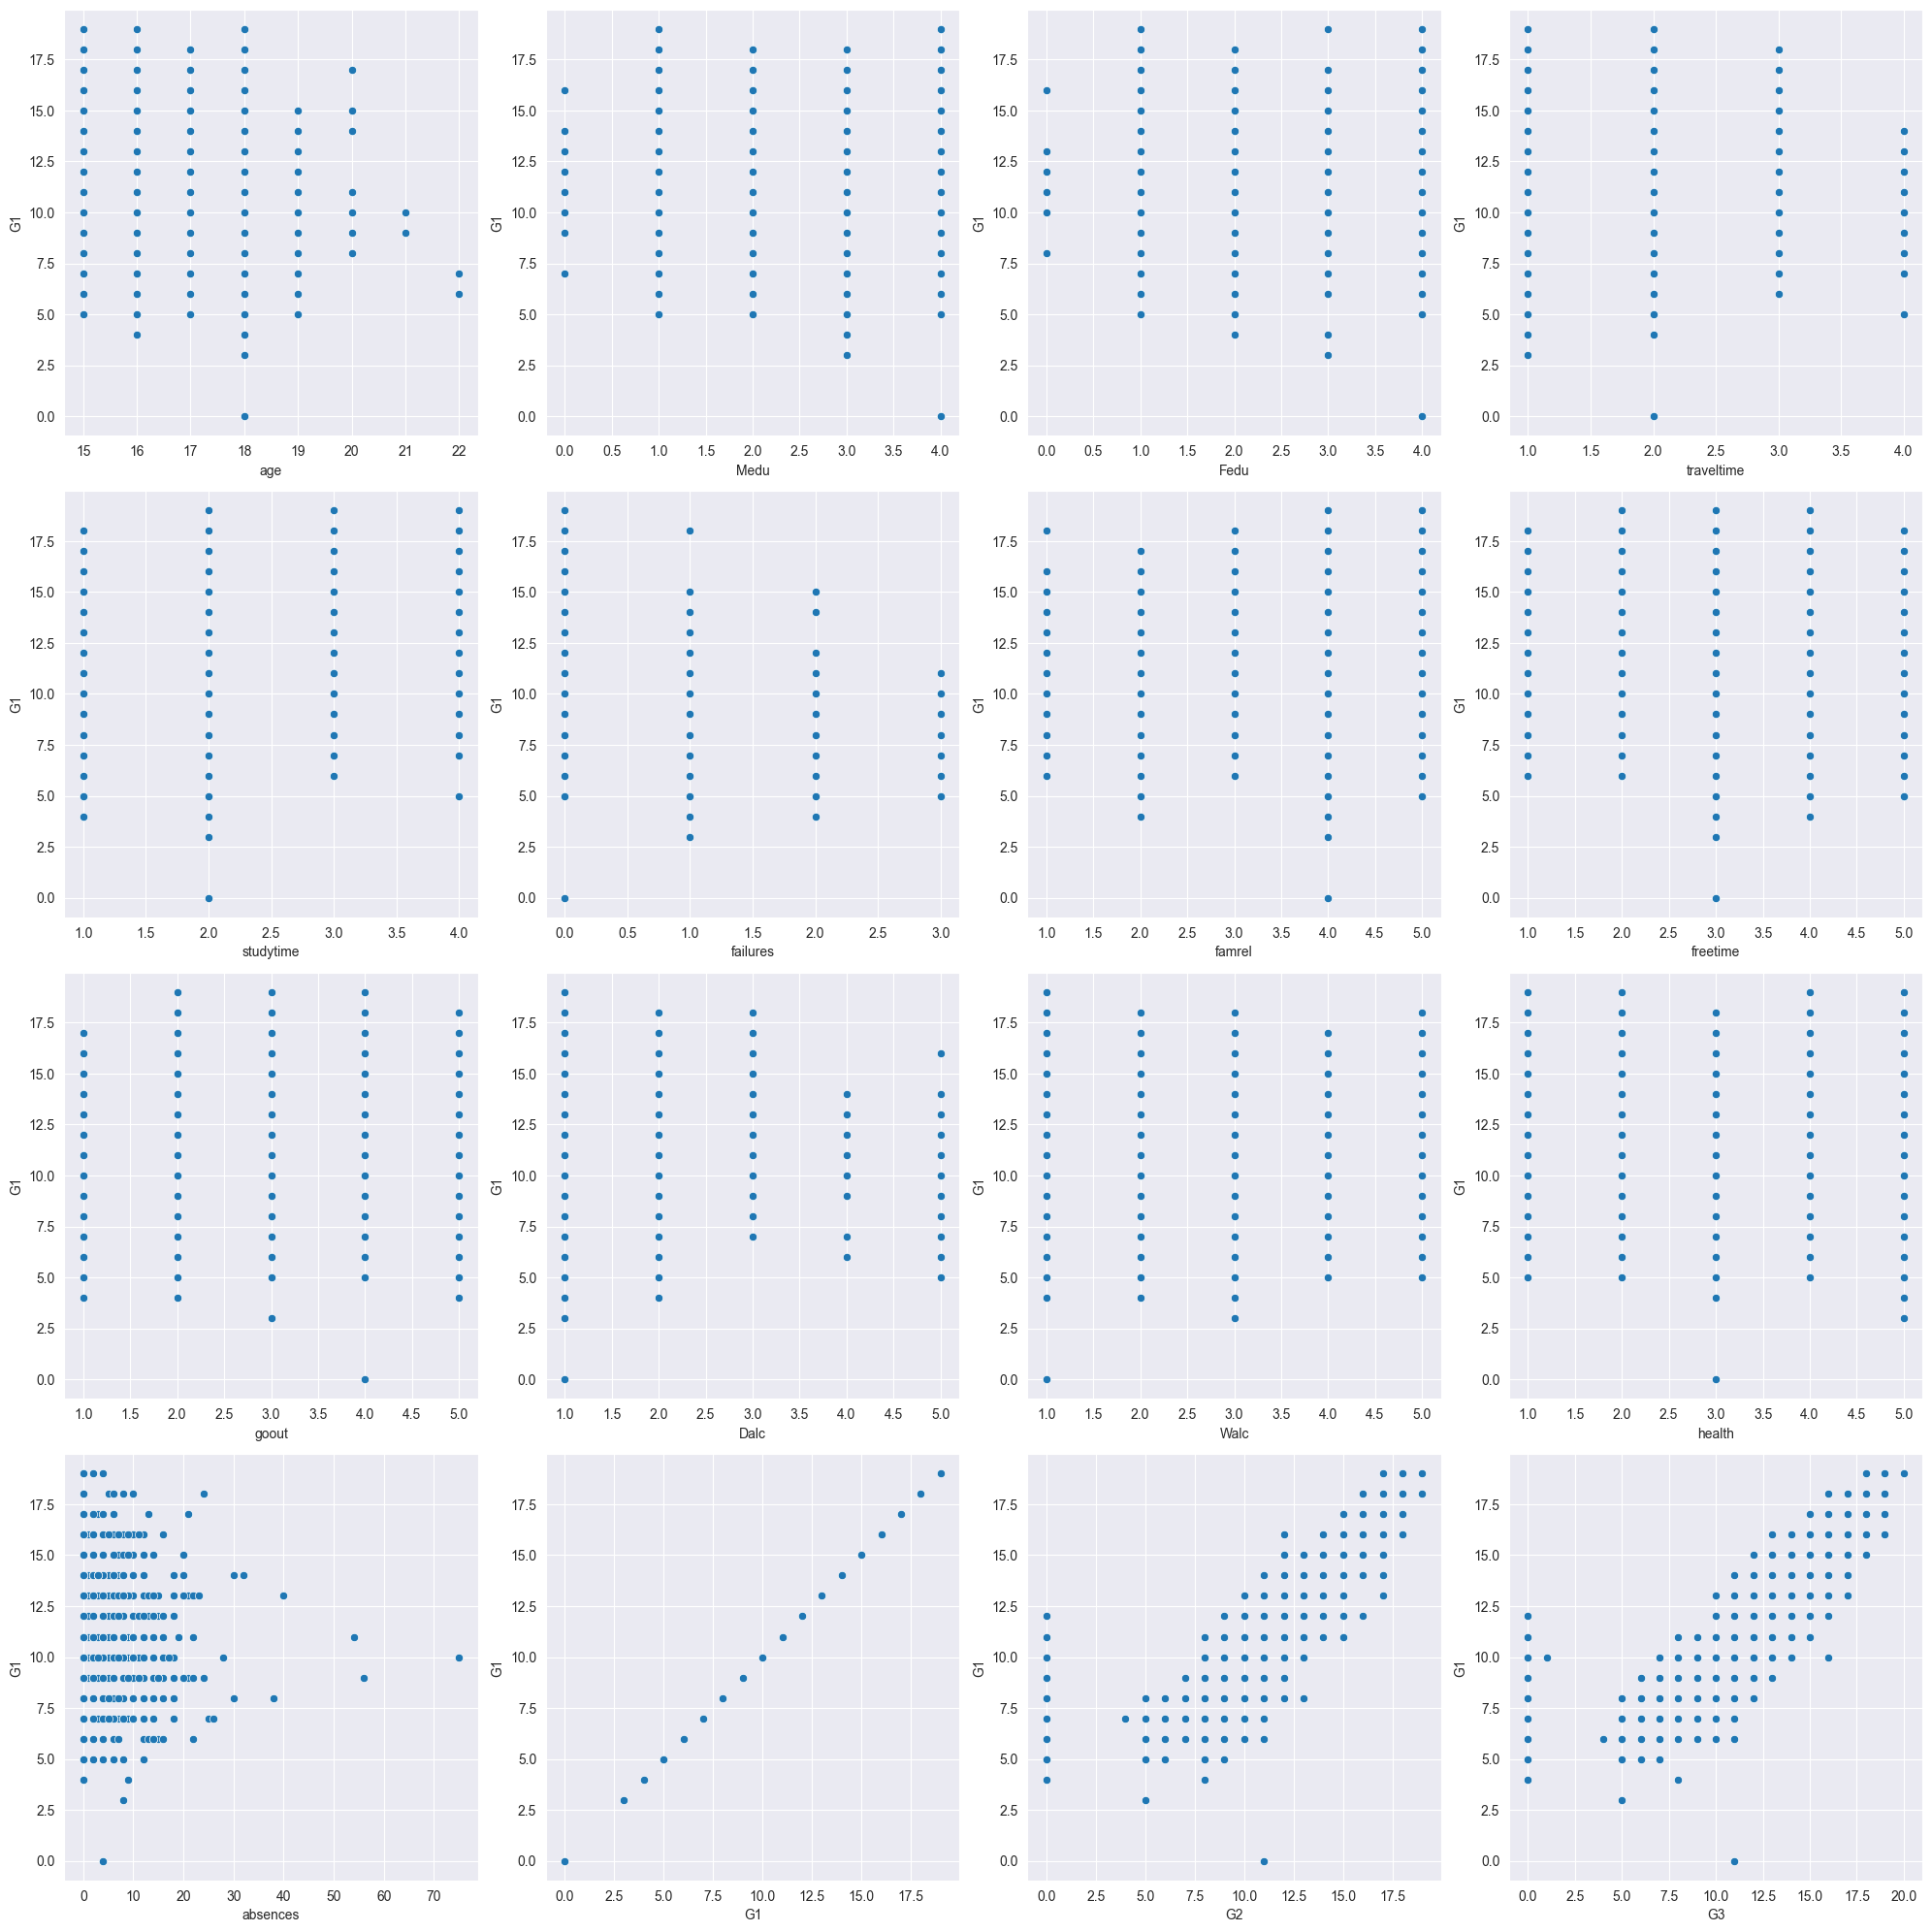

In [196]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='G1',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='G2',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='G3',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

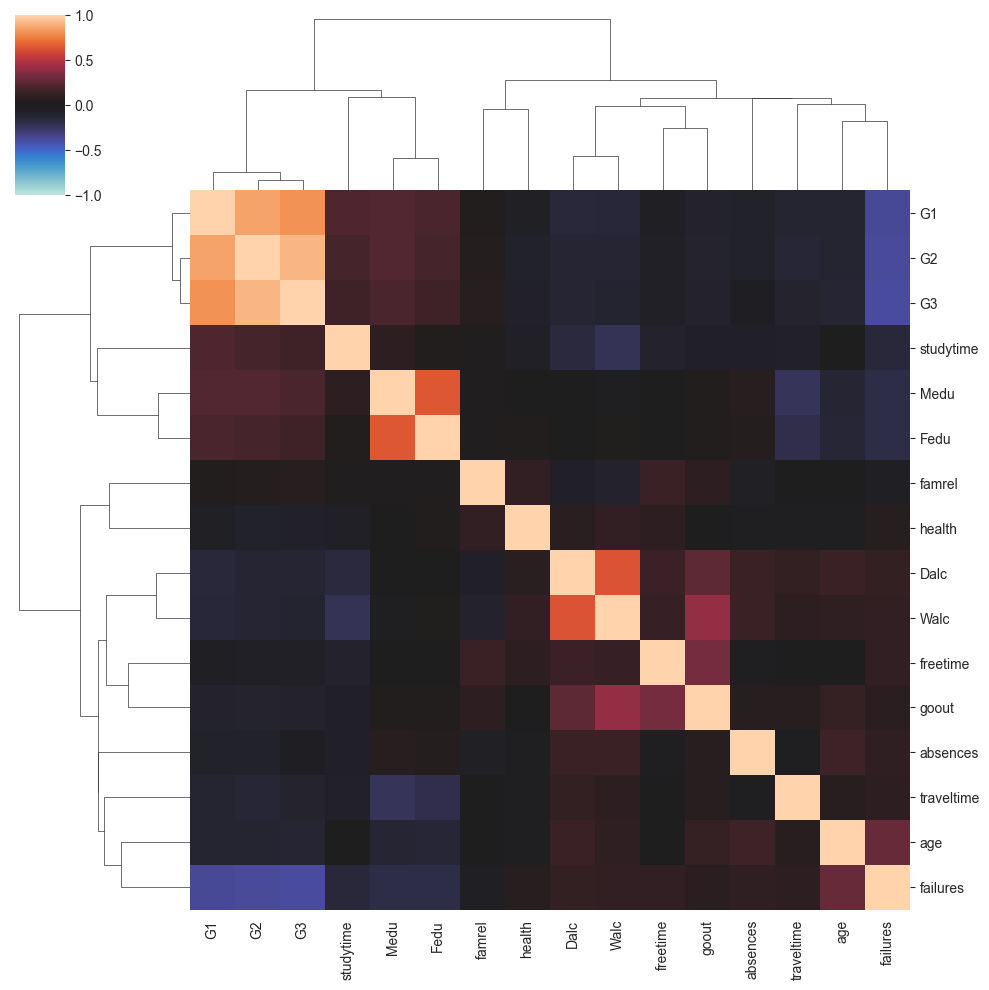

In [197]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )

corrplot(num_df, annot=None)

In [198]:
def corrgraph(model,train):
        # Получение коэффициентов модели
    coefficients = model.coef_[0]
    # Получение названий признаков (если есть)
    feature_names = train.columns
    # Визуализация коэффициентов
    fig = plt.figure(figsize=(15, 6))
    plt.bar(feature_names, abs(coefficients))
    plt.xlabel('Features')
    plt.ylabel('Coefficients')
    plt.title(f'Feature Coefficients for {model}')
    plt.xticks(rotation='vertical')
    plt.show()

In [199]:
def corrtree(model,train):
    feature_names = []
    coefficients = []
    for name, importance in zip(train.columns, model.feature_importances_):
        coefficients.append(importance)
        feature_names.append(name)
    fig = plt.figure(figsize=(15, 6))
    plt.bar(feature_names, coefficients)
    plt.xlabel('Features')
    plt.ylabel('Coefficients')
    plt.title(f'Feature Coefficients for {model}')
    plt.xticks(rotation='vertical')
    plt.show()

<AxesSubplot:>

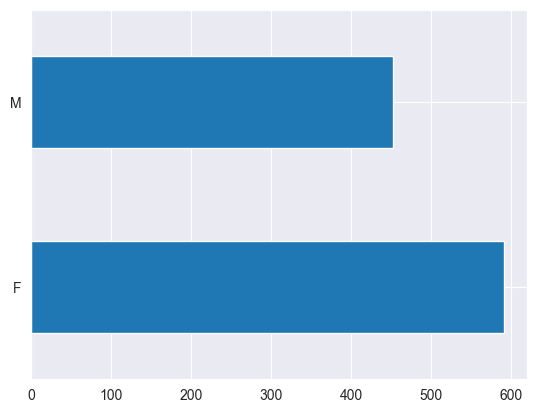

In [200]:
df.sex.value_counts().plot.barh()

In [201]:
label_encoder = LabelEncoder()
categ = ['sex', 'address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
df[categ] = df[categ].apply(label_encoder.fit_transform)
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,1,0,0,4,4,at_home,teacher,course,...,4,3,4,1,1,3,4,0,11,11
1,0,17,1,0,1,1,1,at_home,other,course,...,5,3,3,1,1,3,2,9,11,11
2,0,15,1,1,1,1,1,at_home,other,other,...,4,3,2,2,3,3,6,12,13,12
3,0,15,1,0,1,4,2,health,services,home,...,3,2,2,1,1,5,0,14,14,14
4,0,16,1,0,1,3,3,other,other,home,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,1,0,2,2,services,services,course,...,5,5,4,4,5,4,11,9,9,9
391,1,17,1,1,1,3,1,services,services,course,...,2,4,5,3,4,2,3,14,16,16
392,1,21,0,0,1,1,1,other,other,course,...,5,5,3,3,3,3,3,10,8,7
393,1,18,0,1,1,3,2,services,other,course,...,4,4,1,3,4,5,0,11,12,10


In [202]:
df = pd.get_dummies(data =df, columns=["Mjob","Fjob", 'reason','guardian'])
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,...,0,0,1,1,0,0,0,0,1,0
1,0,17,1,0,1,1,1,1,2,0,...,1,0,0,1,0,0,0,1,0,0
2,0,15,1,1,1,1,1,1,2,0,...,1,0,0,0,0,1,0,0,1,0
3,0,15,1,0,1,4,2,1,3,0,...,0,1,0,0,1,0,0,0,1,0
4,0,16,1,0,1,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,1,0,2,2,1,2,2,...,0,1,0,1,0,0,0,0,0,1
391,1,17,1,1,1,3,1,2,1,0,...,0,1,0,1,0,0,0,0,1,0
392,1,21,0,0,1,1,1,1,1,3,...,1,0,0,1,0,0,0,0,0,1
393,1,18,0,1,1,3,2,3,1,0,...,1,0,0,1,0,0,0,0,1,0


In [203]:
col = ['age', 'Fedu','traveltime', 'studytime','famrel','freetime', 'goout','Dalc','Walc','health','absences']
df[col]= df[col].apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=0)
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0.428571,1,0,0,4,1.00,0.333333,0.333333,0,...,0,0,1,1,0,0,0,0,1,0
1,0,0.285714,1,0,1,1,0.25,0.000000,0.333333,0,...,1,0,0,1,0,0,0,1,0,0
2,0,0.000000,1,1,1,1,0.25,0.000000,0.333333,0,...,1,0,0,0,0,1,0,0,1,0
3,0,0.000000,1,0,1,4,0.50,0.000000,0.666667,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0.142857,1,0,1,3,0.75,0.000000,0.333333,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0.714286,1,1,0,2,0.50,0.000000,0.333333,2,...,0,1,0,1,0,0,0,0,0,1
391,1,0.285714,1,1,1,3,0.25,0.333333,0.000000,0,...,0,1,0,1,0,0,0,0,1,0
392,1,0.857143,0,0,1,1,0.25,0.000000,0.000000,3,...,1,0,0,1,0,0,0,0,0,1
393,1,0.428571,0,1,1,3,0.50,0.666667,0.000000,0,...,1,0,0,1,0,0,0,0,1,0


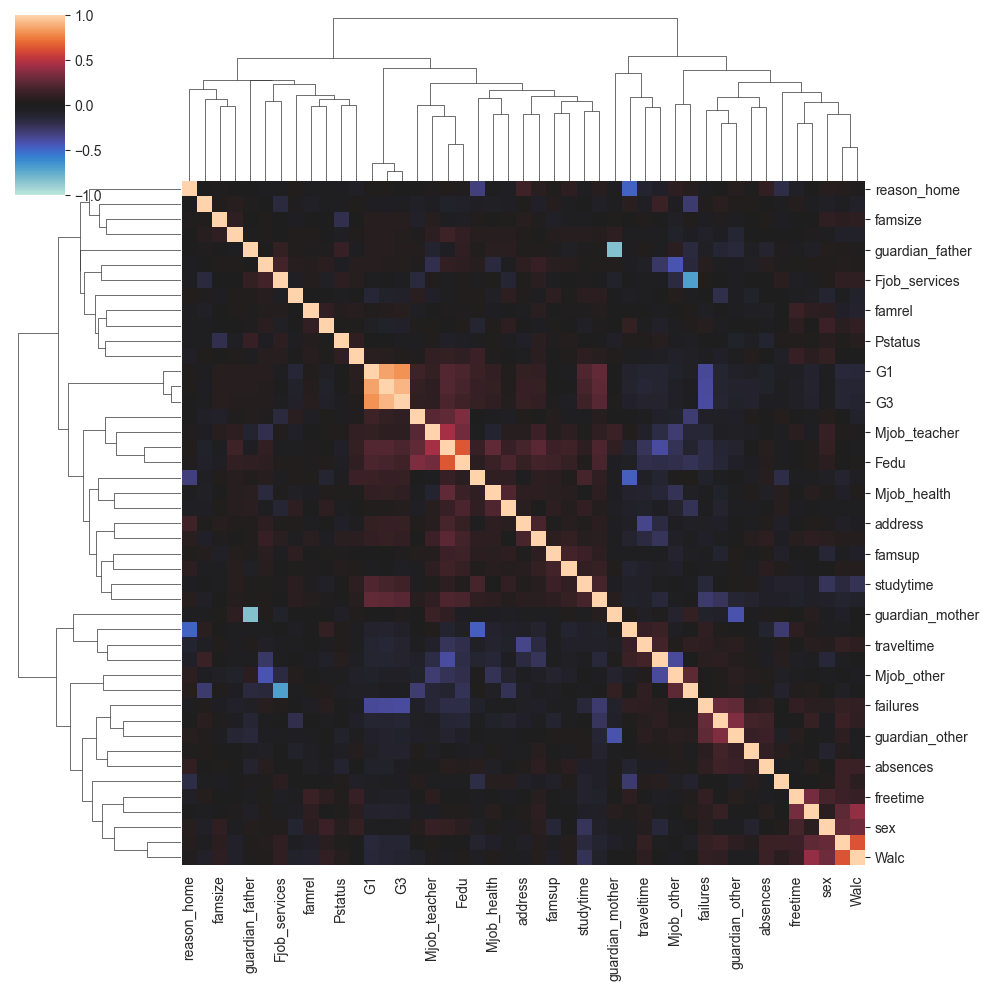

In [204]:
num_df = df.select_dtypes(exclude='object')
corrplot(num_df, annot=None)

### удаление нулей в g3

In [ ]:
grades = ['G1', 'G2', 'G3']
list_zeros_math = pd.DataFrame(df[grades].loc[df['G3']==0])
list_zeros_math

In [ ]:
df.drop(df[df['G3']==0].index, inplace=True)
df.shape

# Раздел Регрессии
### Создание двух датафреймов для трейн и тест регрессий

In [ ]:
X = df.drop(["G1","G2","G3"], axis = 1)
y = df[["G1","G2","G3"]]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=12)
train_df = pd.concat([X_train, y_train])
train_df = X_train
train_df["G1"] = y_train["G1"]
train_df["G2"] = y_train["G2"]
train_df["G3"] = y_train["G3"]
test_df = pd.concat([X_test, y_test],axis=1)

In [ ]:
nan_df = (df.isnull().mean() * 100).reset_index()
nan_df

In [ ]:
def get_almost_constant_columns(df, dropna=True):
    cols = []
    for i in df:
        if dropna:
            counts = df[i].dropna().value_counts()
        else:
            counts = df[i].value_counts()
        most_popular_value_count = counts.iloc[0]
        if (most_popular_value_count / len(df)) * 100 > 96:
            cols.append(i)
    return cols

In [ ]:
overfit_cat = get_almost_constant_columns(cat_df)
overfit_cat

In [ ]:
overfit_num = get_almost_constant_columns(num_df, dropna=True)
overfit_num

In [ ]:
train_df = train_df.drop(overfit_num, axis=1)
test_df = test_df.drop(overfit_num, axis = 1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

### Регрессии через  KFold

In [ ]:
#Проверка KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
XX = df.drop(["G1","G2","G3"], axis = 1)
Y = df[["G3"]]

In [ ]:
modelSGD = SGDRegressor()
for train_index, test_index in kf.split(XX):
    X_train, X_test = XX.iloc[train_index], XX.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    modelSGD.partial_fit(X_train, y_train)
    score = modelSGD.score(X_test, y_test)
    print(score)
print(score)

In [ ]:
modelRidge = Ridge(alpha=1,solver='saga')
for train_index, test_index in kf.split(XX):
    X_train, X_test = XX.iloc[train_index], XX.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    modelRidge.fit(X_train, y_train)
    score = modelRidge.score(X_test, y_test)
    print(score)
print(score)

In [ ]:
model = LinearRegression()
for train_index, test_index in kf.split(XX):
    X_train, X_test = XX.iloc[train_index], XX.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(score)
print(score)

### Отдельные Регрессии

In [ ]:
#Разбиение на Train Test для регрессий.
delete = ["G1","G2","G3"] #  "G1","G2","G3" или "G2","G3" или "G3"
target = ["G3"]
mX_train = train_df.drop(delete, axis = 1)
mY_train = train_df[target]
mX_test = test_df.drop(delete, axis = 1)
mY_test = test_df[target]

In [ ]:
mX_train.shape, mX_test.shape, mY_train.shape, mY_test.shape

In [ ]:
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(mX_train, mY_train)
Gradient_score = Gradient_model.predict(mX_test)
Gradient_model.score(mX_test,mY_test)

In [ ]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(mX_train, mY_train)
Linearscore = LinearRegression_model.predict(mX_test)
LinearRegression_model.score(mX_test,mY_test)

In [ ]:
pf = PolynomialFeatures()
x_poly = pf.fit_transform(mX_train)
LinearRegression_model.fit(x_poly,mY_train)
LinearRegression_model.score(mX_test,mY_test)

In [ ]:
x_l = np.linspace(0,20,100)
y_l = x_l
fig, g1 = plt.subplots(1,1,figsize=(10,6))
g1.scatter(mY_test,Linearscore, c='r')
g1.plot(x_l, y_l, c='black', linewidth=2)
g1.set(title='Exam predictions Linear Regression', xlabel='True values', ylabel='Predicted values')

In [ ]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(mX_train,mY_train)
lasso_predict = lasso_model.predict(mX_test)
lasso_model.score(mX_test,mY_test)

In [ ]:
x_l = np.linspace(0,20,100)
y_l = x_l
fig, g1 = plt.subplots(1,1,figsize=(10,6))
g1.scatter(mY_test,lasso_predict, c='r')
g1.plot(x_l, y_l, c='black', linewidth=2)
g1.set(title='Exam predictions Lasso Regression', xlabel='True values', ylabel='Predicted values')

In [ ]:
from sklearn import tree
from sklearn.tree import plot_tree

In [ ]:
Tree_model = tree.DecisionTreeRegressor(max_depth=6,min_samples_leaf=20,min_samples_split= 2)
Tree_model.fit(mX_train,mY_train)
Treescore = Tree_model.predict(mX_test)
Tree_model.score(mX_test,mY_test)

In [ ]:
x_l = np.linspace(0,20,100)
y_l = x_l
fig, g1 = plt.subplots(1,1,figsize=(10,6))
g1.scatter(mY_test,Treescore, c='r')
g1.plot(x_l, y_l, c='black', linewidth=2)
g1.set(title='Exam predictions Tree regression', xlabel='True values', ylabel='Predicted values')

In [ ]:
import graphviz
dot_data = tree.export_graphviz(Tree_model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Tree")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
tree.plot_tree(Tree_model)


# Раздел классификации.
## Разделение G3 на диапазоны 0-5 5-10 10-15 15-20


In [ ]:
def trans(x):
    if x == 20:
        return 3
    return x % 5

In [ ]:
# Новый датафрейм чтобы не мешать старому
df1 = df
df1['G3'] = df1['G3'].apply(trans)
df1['G2'] = df1['G2'].apply(trans)
df1['G1'] = df1['G1'].apply(trans)

In [ ]:
X = df1.drop(["G1", "G2", "G3"], axis=1)
y = df1[["G1", "G2", "G3"]]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.25, random_state=12)
train_df_1 = pd.concat([X_train_1, y_train_1])
train_df_1 = X_train_1
train_df_1["G1"] = y_train_1["G1"]
train_df_1["G2"] = y_train_1["G2"]
train_df_1["G3"] = y_train_1["G3"]
test_df_1 = pd.concat([X_test_1, y_test_1], axis=1)

In [ ]:
#Разбиение на Train Test для классификаций.
delete = ["G1","G2","G3"] #  "G1","G2","G3" или "G2","G3" или "G3"
target = ["G3"]
mX_train_1 = train_df_1.drop(delete, axis = 1)
mY_train_1 = train_df_1[target]
mX_test_1 = test_df_1.drop(delete, axis = 1)
mY_test_1 = test_df_1[target]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from catboost import CatBoostClassifier

In [ ]:
Logic_model = LogisticRegression()
Logic_model.fit(mX_train_1, mY_train_1)
Logic_model.score(mX_test_1,mY_test_1)


In [ ]:
# Получение коэффициентов модели
coefficients = Logic_model.coef_[0]
# Получение названий признаков (если есть)
feature_names = mX_test_1.columns
# Визуализация коэффициентов
fig = plt.figure(figsize=(15, 6))
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Feature Coefficients for Logic Regression')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
tree_class_model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
tree_class_model.fit(mX_train_1, mY_train_1)
tree_class_model.predict(mX_test_1)
tree_class_model.score(mX_test_1,mY_test_1)


In [ ]:
from sklearn import tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
tree.plot_tree(tree_class_model)

In [ ]:
Cat_class_model_g3 = CatBoostClassifier()
Cat_class_model_g3.fit(mX_train_1, mY_train_1)
Cat_class_model_g3_predict = Cat_class_model_g3.predict(mX_test_1)
Cat_class_model_g3.score(mX_test_1, mY_test_1)

# Предсказывание других целей
## Например уровня буднего алкоголизма

In [282]:
def PredGraph(mY_test,True_val,title):
    plt.figure(figsize=(5,5))
    dff = pd.DataFrame({'x1': mY_test, 'x2': True_val.ravel()})
    counts = dff.groupby(['x1', 'x2']).size().reset_index(name='counts')
    colors = counts['counts']
    plt.scatter(counts['x1'], counts['x2'], c=colors, cmap='viridis')
    # Добавляем линию x=y
    min_val = min(dff['x1'].min(), dff['x2'].min())
    max_val = max(dff['x1'].max(), dff['x2'].max())
    # Нарисовать линию x=y
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2)
    plt.colorbar(label='y')
    plt.title(title)
    plt.ylabel('Predicted Values')
    plt.xlabel('True Values')

In [205]:
def trans01(x):
    if x == 0:
        return 0
    return 1

In [219]:
#Разбиение на Train Test для классификации.
delete = ["Dalc","Walc"] #  "G1","G2","G3" или "G2","G3" или "G3"
target = ["Dalc"]
train_df['Dalc'] = train_df['Dalc'].apply(trans01)
test_df['Dalc'] = test_df['Dalc'].apply(trans01)
lab = preprocessing.LabelEncoder()
mX_train = train_df.drop(delete, axis = 1)
mY_train = train_df[target]
mX_test = test_df.drop(delete, axis = 1)
mY_test = test_df[target]
mY_train = lab.fit_transform(mY_train)
mY_test = lab.fit_transform(mY_test)

In [222]:
unique_values, counts = np.unique(mY_train, return_counts=True)
print(unique_values,counts)

[0 1] [504 210]


In [223]:
Logic_model_alc = LogisticRegression()
Logic_model_alc.fit(mX_train, mY_train)
Logic_model_alc_predict = Logic_model_alc.predict(mX_test)
Logic_model_alc.score(mX_test,mY_test)

0.7352941176470589

Accuracy: 0.68


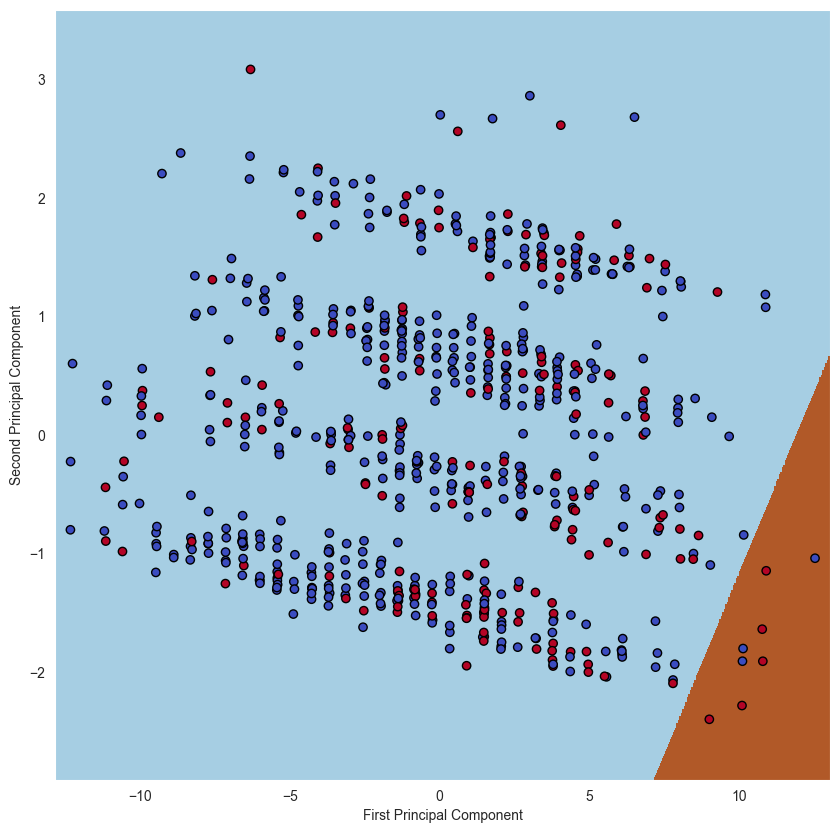

In [224]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(mX_train)
X_test_pca = pca.transform(mX_test)
clf = LogisticRegression().fit(X_train_pca, mY_train)
y_pred = clf.predict(X_test_pca)
# Рассчитайте точность
accuracy = accuracy_score(mY_test, y_pred)
print('Accuracy: %.2f' % accuracy)
# Создайте сетку координат для визуализации
x_min, x_max = X_train_pca[:, 0].min() - .5, X_train_pca[:, 0].max() + .5
y_min, y_max = X_train_pca[:, 1].min() - .5, X_train_pca[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Используйте модель для прогнозирования на сетке
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Покажите результат
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 10))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Также покажите обучающие точки
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=mY_train, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.show()


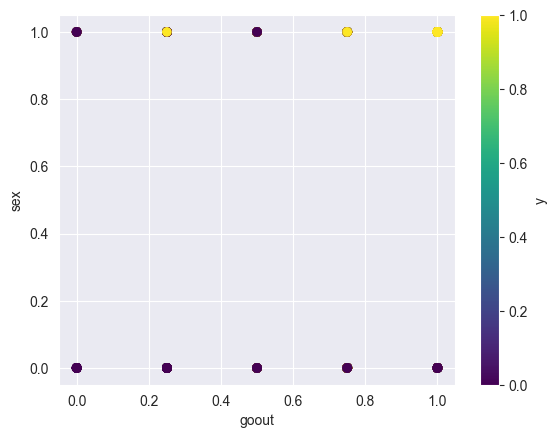

In [225]:
import matplotlib.pyplot as plt

# предположим, что 'df' - это ваш датафрейм
x1 = mX_train['goout']
x2 = mX_train['sex']
colors = mY_train
# Выберите два признака для визуализации

plt.scatter(x1, x2, c=colors, cmap='viridis')
plt.colorbar(label='y')  # показывает цветовую шкалу с меткой 'y'
plt.xlabel('goout')
plt.ylabel('sex')
plt.show()


In [226]:

# Предположим, что arr - это ваш numpy массив
unique, counts = np.unique(mY_train, return_counts=True)

# Вывод уникальных значений и их количества
for u, c in zip(unique, counts):
    print(f'Value: {u}, count: {c}')

Value: 0, count: 504
Value: 1, count: 210


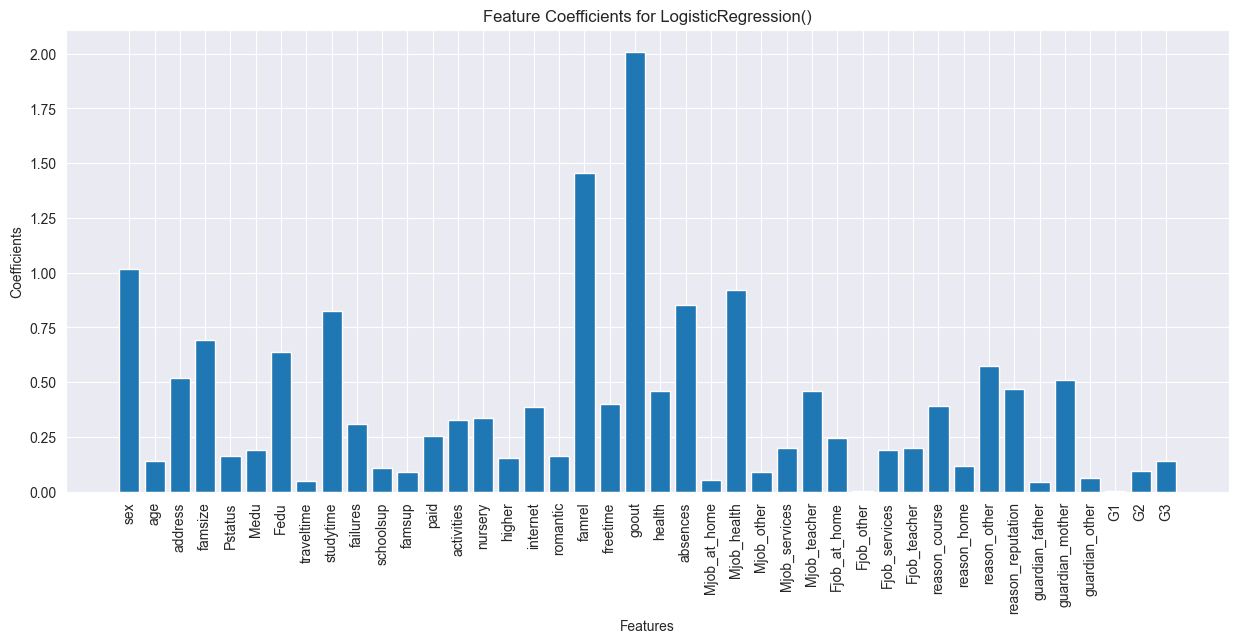

In [227]:
corrgraph(Logic_model_alc,mX_train)

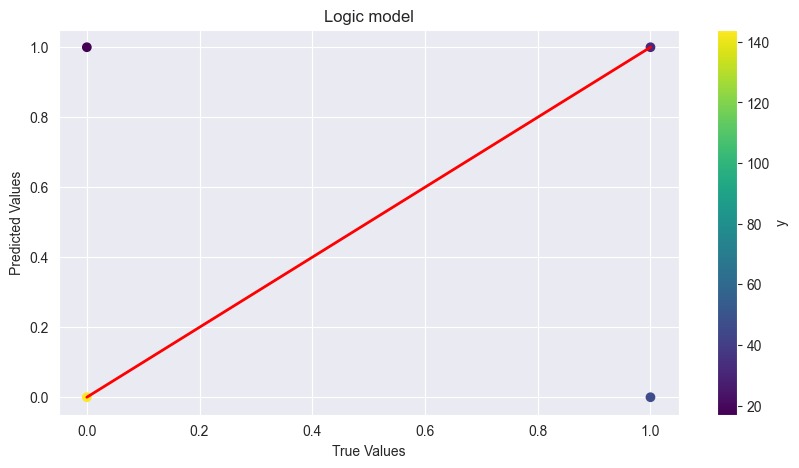

In [228]:
PredGraph(mY_test,Logic_model_alc_predict,'Logic model')

In [229]:
tree_class_model_alc = DecisionTreeClassifier(max_depth=7, min_samples_leaf=5)
tree_class_model_alc.fit(mX_train, mY_train)
tree_model_alc_predict = tree_class_model_alc.predict(mX_test)
tree_class_model_alc.score(mX_test,mY_test)


0.7184873949579832

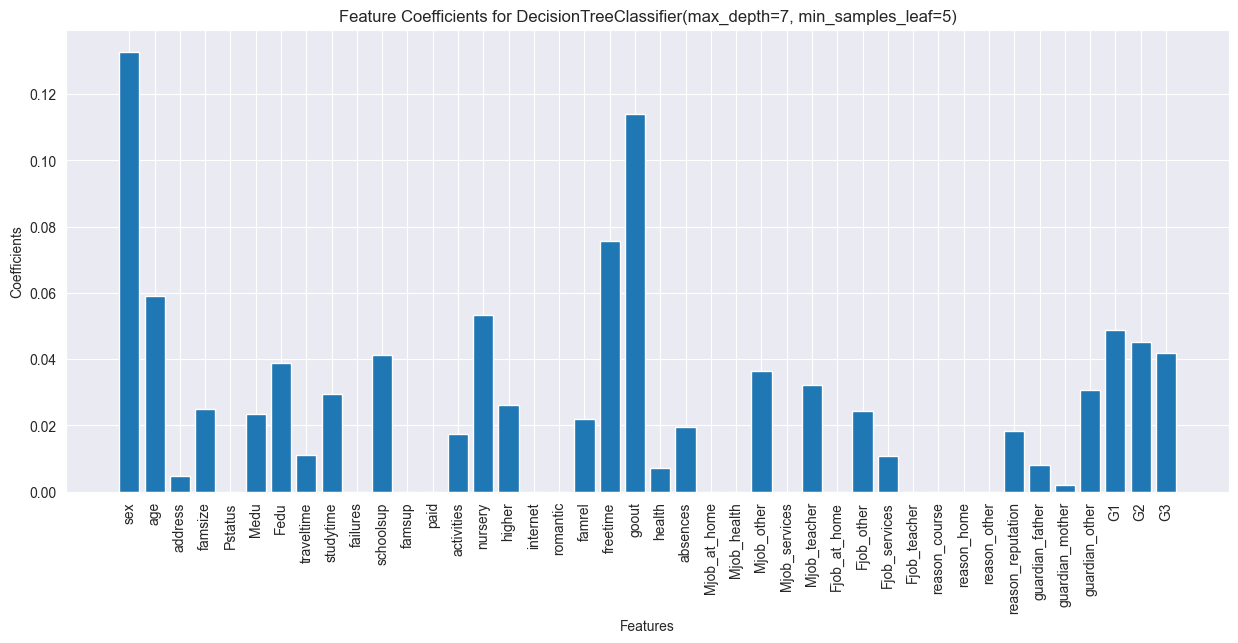

In [230]:
corrtree(tree_class_model_alc,mX_train)

In [ ]:
from sklearn import tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
tree.plot_tree(tree_class_model_alc)

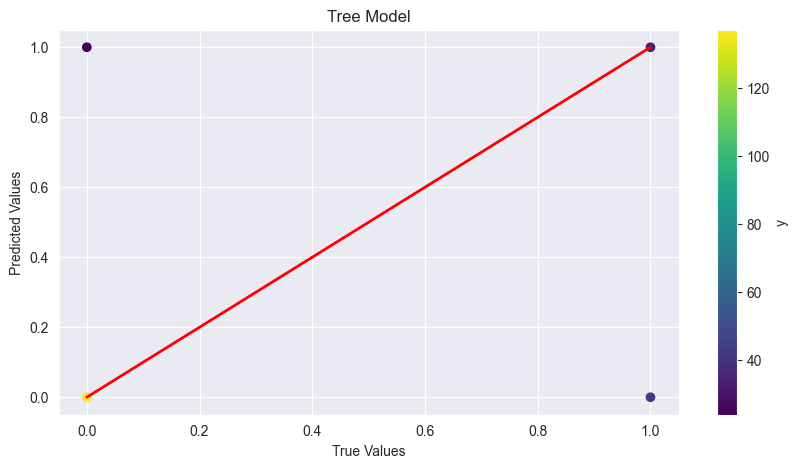

In [233]:
PredGraph(mY_test,tree_model_alc_predict,'Tree Model')

In [234]:
Gradient_class_model_alc = GradientBoostingClassifier(max_depth=7,loss='deviance')
Gradient_class_model_alc.fit(mX_train,mY_train)
Gradient_class_model_alc_predict = Gradient_class_model_alc.predict(mX_test)
Gradient_class_model_alc.score(mX_test,mY_test)

0.8235294117647058

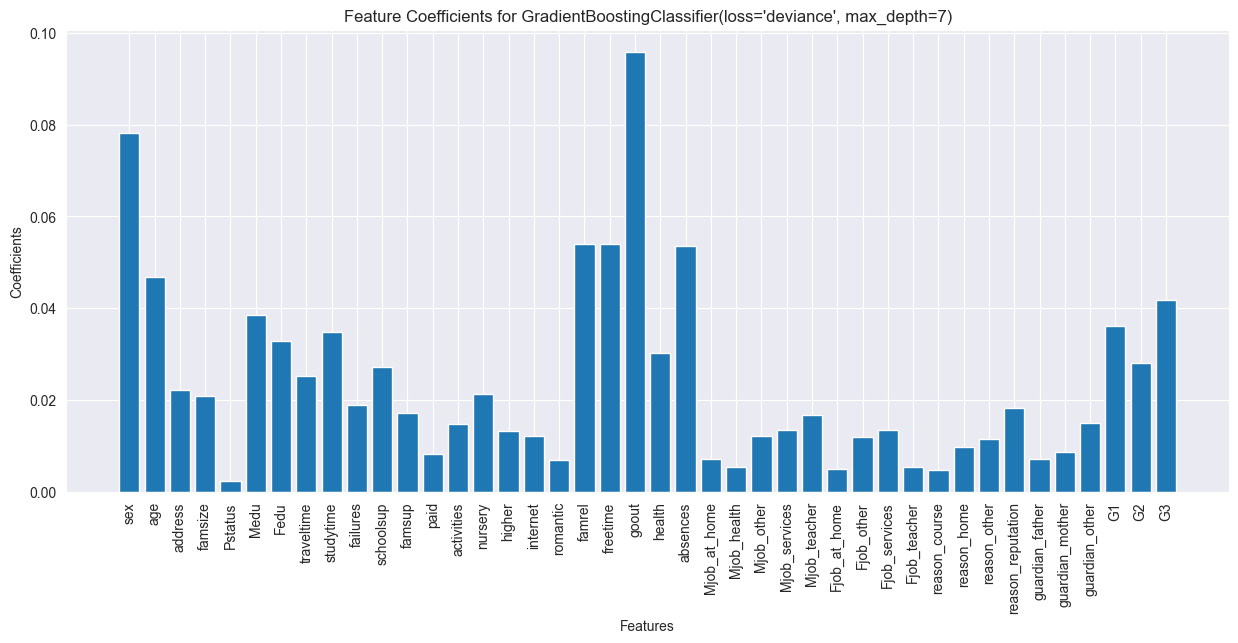

In [235]:
corrtree(Gradient_class_model_alc,mX_train)

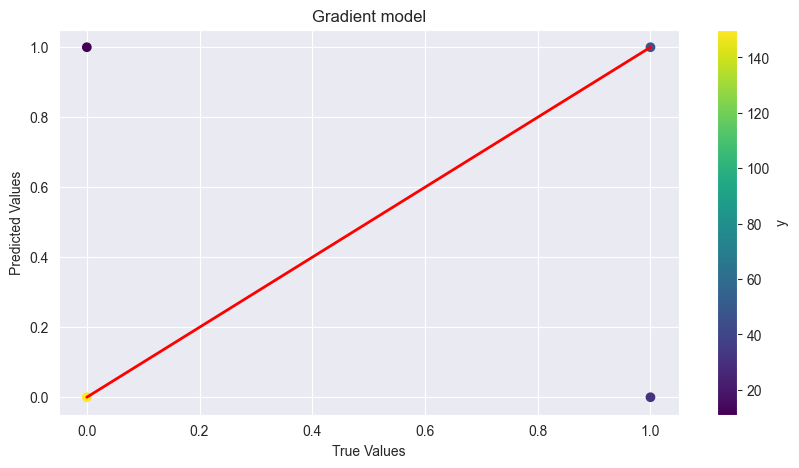

In [236]:
PredGraph(mY_test,Gradient_class_model_alc_predict,'Gradient model')

0:	learn: 0.6396057	test: 0.6691157	best: 0.6691157 (0)	total: 54ms	remaining: 8.04s
1:	learn: 0.5924842	test: 0.6435014	best: 0.6435014 (1)	total: 80.5ms	remaining: 5.96s
2:	learn: 0.5470606	test: 0.6169748	best: 0.6169748 (2)	total: 149ms	remaining: 7.31s
3:	learn: 0.5078642	test: 0.6053778	best: 0.6053778 (3)	total: 178ms	remaining: 6.49s
4:	learn: 0.4712510	test: 0.5844288	best: 0.5844288 (4)	total: 200ms	remaining: 5.8s
5:	learn: 0.4427636	test: 0.5719287	best: 0.5719287 (5)	total: 231ms	remaining: 5.54s
6:	learn: 0.4181393	test: 0.5654971	best: 0.5654971 (6)	total: 263ms	remaining: 5.37s
7:	learn: 0.3910903	test: 0.5501906	best: 0.5501906 (7)	total: 289ms	remaining: 5.12s
8:	learn: 0.3663952	test: 0.5375940	best: 0.5375940 (8)	total: 338ms	remaining: 5.29s
9:	learn: 0.3469085	test: 0.5285991	best: 0.5285991 (9)	total: 370ms	remaining: 5.18s
10:	learn: 0.3321761	test: 0.5232785	best: 0.5232785 (10)	total: 396ms	remaining: 5s
11:	learn: 0.3238062	test: 0.5198476	best: 0.5198476 (11

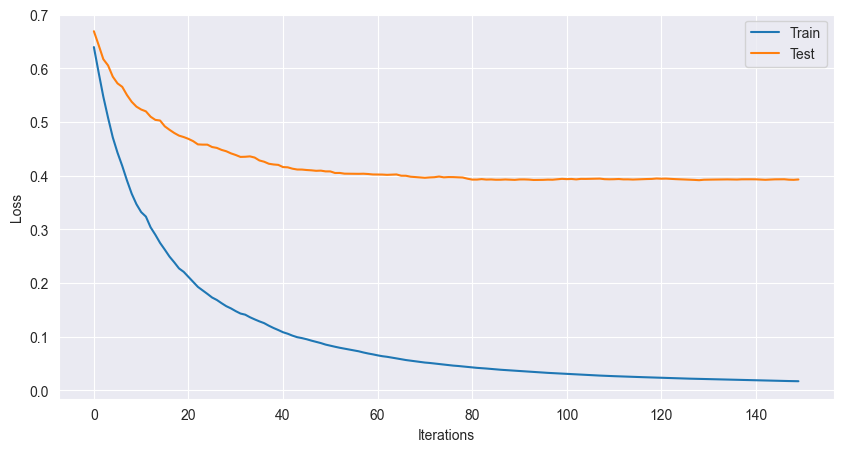

In [261]:
from catboost import CatBoostClassifier, Pool

Cat_class_model = CatBoostClassifier(iterations=150, learning_rate=0.1, depth=10, loss_function='Logloss', random_seed=42)
Cat_class_model.fit(mX_train, mY_train,eval_set=(mX_test, mY_test))
 #Получим значения ошибки на каждом этапе обучения
train_errors = Cat_class_model.evals_result_['learn']['Logloss']
test_errors = Cat_class_model.evals_result_['validation']['Logloss']

# Визуализируем ошибки
plt.figure(figsize=(10,5))
plt.plot(train_errors, label='Train')
plt.plot(test_errors, label='Test')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

In [262]:
Cat_class_model_alc_predict = Cat_class_model.predict(mX_test)
Cat_class_model.score(mX_test, mY_test)

0.8403361344537815

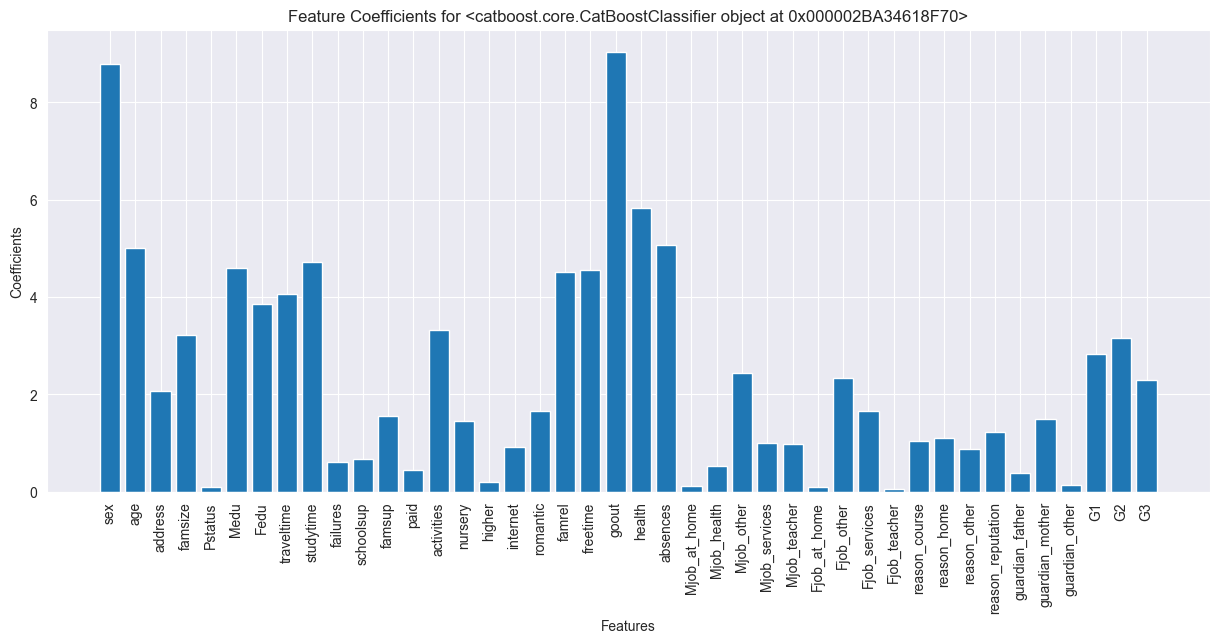

In [239]:
corrtree(Cat_class_model,mX_train)

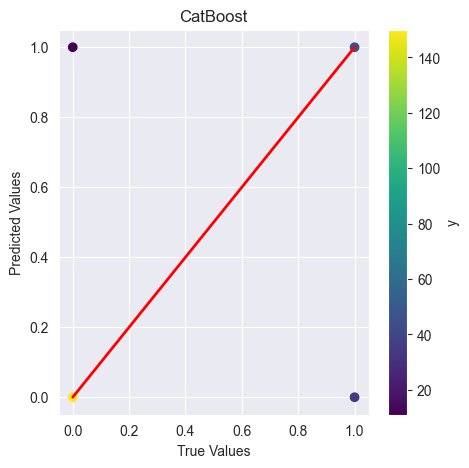

In [244]:
PredGraph(mY_test,Cat_class_model_alc_predict,'CatBoost')

In [269]:
#Проверка KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
XX = df.drop(["Dalc","Walc"], axis = 1)
Y = df[["Dalc"]]
Y['Dalc'] = Y['Dalc'].apply(trans01)

0.9090909090909091
0.8660287081339713
0.8421052631578947
0.8755980861244019
0.9086538461538461


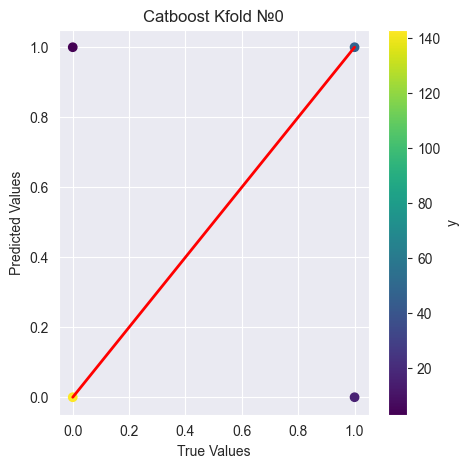

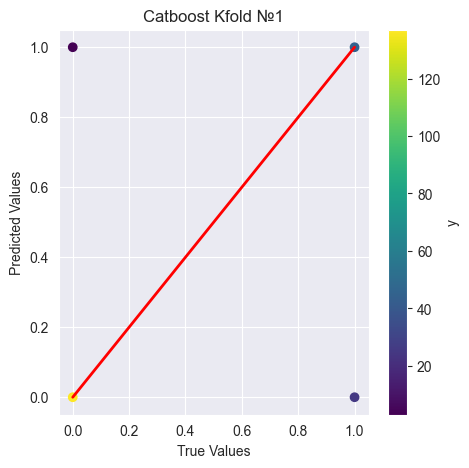

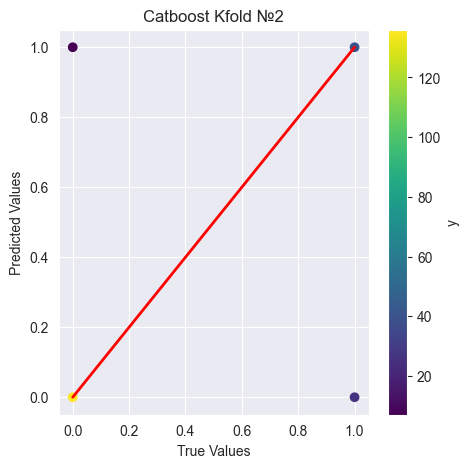

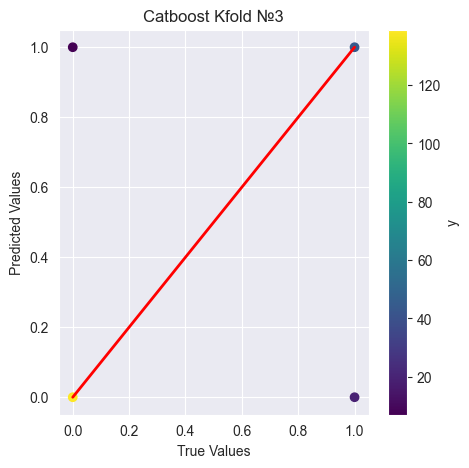

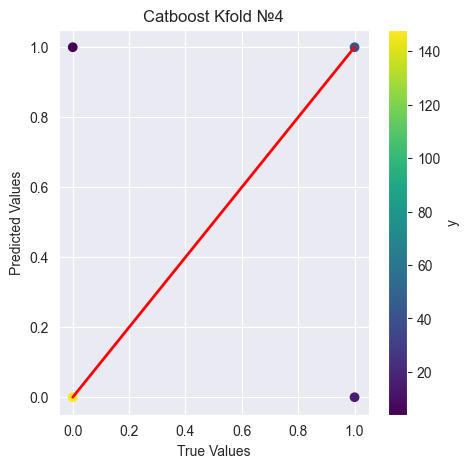

In [287]:
Cat_class_model_fold = CatBoostClassifier(iterations=150, learning_rate=0.1, depth=10, loss_function='Logloss', random_seed=42)
k = 0
for train_index, test_index in kf.split(XX):
    X_train, X_test = XX.iloc[train_index], XX.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    Cat_class_model_fold.fit(X_train, y_train,verbose=False)
    Cat_class_model_alc_fold_predict = Cat_class_model_fold.predict(X_test)
    score = Cat_class_model_fold.score(X_test, y_test)
    PredGraph(y_test['Dalc'].to_numpy(),Cat_class_model_alc_fold_predict,f'Catboost Kfold №{k}')
    plt.savefig(f'FoldCatBOost{k}.png')
    k+=1
    print(score)
